# IMDB MOVIES DATASET ANALYSIS
# PHASE 2 PROJECT
# Business problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.
# The Data
In the folder zippedData are movie datasets from:

* Box Office Mojo 
* IMDB
* Rotten Tomatoes
* TheMovieDB
* The Numbers



# Key points
* The analysis should yield three concrete business recommendations.
* Effective data communication
* 3 Main visualizations

# Business Objectives

1. Produce Profitable Blockbuster Films

* Objective: Create highly marketable films with wide appeal, leveraging trends to achieve profitable box office and streaming revenue.
* KPI: Achieve at least 20% ROI on each film project within one year of release.


2. Optimize Production Costs and Budgets

* Objective: Establish a standardized budget and cost optimization framework to ensure cost-efficiency across productions.
* KPI: Keep production costs within 10% of the initial budget estimate.

3. Trend-Driven Content Development

* Objective: Develop a content pipeline that identifies, analyzes, and adapts current film trends to ensure audience interest and market relevance.
* KPI: Produce a minimum of three films per year inspired by top-performing genres or themes identified through trend analysis.



# Key Questions from Business Stakeholders
1. Content and Genre Trends

* What are the top-performing genres this year, and how have they shifted over recent years?
* How can we ensure that our content aligns with current audience preferences while still offering something unique?

2. Budget and Cost Management

* What is the projected budget for this film, and are there any opportunities to reduce costs without compromising quality?
* What are the financial risks involved if the film exceeds the budget?

3. Return on Investment (ROI) and Revenue Projections

* Based on similar past films, what is the expected ROI for this project?
* What revenue milestones should we set, and over what timeline?

In [ ]:
# importing necessary libraries for data analysis
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import statsmodels.api as sm
import zipfile
import os

# Loading the different datasets

In [ ]:
# read movie_gross cleaned as a group
movie_gross= pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/bom_movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
movie_budget = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tn_movie_budgets.csv")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
movie_details = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tmdb_movies.csv")
movie_details.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,19/11/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,26/03/2010,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,07/05/2010,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,22/11/1995,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,16/07/2010,Inception,8.3,22186


In [6]:
reviews = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/rt.reviews.tsv", sep='\t', encoding='ISO-8859-1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
movie_info = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/rt.movie_info.tsv", sep='\t', encoding='ISO-8859-1')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Checking for null values

In [12]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [13]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [16]:
movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# Focus Question 1
## Content and Genre Trends

* What are the top-performing genres this year, and how have they shifted over recent years?
* How can we ensure that our content aligns with current audience preferences while still offering something unique? 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the necessary data
bom_movie_gross = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/bom_movie_gross.csv")  # Adjust path as needed
rt_movie_info = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/rt.movie_info.tsv", sep='\t')
tmdb_movies = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tmdb_movies.csv")

# Date parsing and genre processing
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year

tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].apply(lambda x: x.strip('[]').split(','))  # Adjust if needed
tmdb_movies_exploded = tmdb_movies.explode('genre_ids')

# Calculate average popularity per genre per year
genre_trends = tmdb_movies_exploded.groupby(['release_year', 'genre_ids'])['popularity'].mean().unstack().fillna(0)

# Filter to top 10 genres based on the latest year
latest_year = genre_trends.index.max()
top_genres_latest_year = genre_trends.loc[latest_year].sort_values(ascending=False).head(10).index
top_10_genre_trends = genre_trends[top_genres_latest_year]

# Convert to long format for Plotly
top_10_genre_trends_long = top_10_genre_trends.reset_index().melt(id_vars='release_year', 
                                                                   var_name='Genre', 
                                                                   value_name='Popularity')

# Create interactive line plot with Plotly
fig = px.line(top_10_genre_trends_long, x='release_year', y='Popularity', color='Genre',
              title="Top 10 Genre Popularity Trends Over the Years")

# Show plot with interactive toggling capabilities
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8332\2251211134.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')


# Focus Question 2
## Budget and Cost Management

* What is the projected budget for this film, and are there any opportunities to reduce costs without compromising quality?
* What are the financial risks involved if the film exceeds the budget?

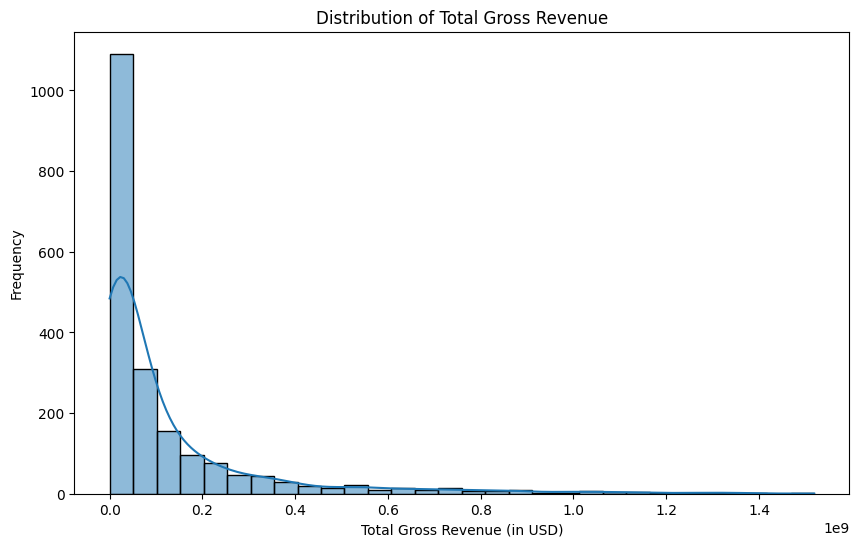

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
bom_movie_gross = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/bom_movie_gross.csv")
tmdb_movies = pd.read_csv("C:/Users/DELL/Desktop/Moringa projects/DSF_PT08P2_Phase_2_Project_Grp_1_Final/Data/tmdb_movies.csv")

# Convert relevant fields to numeric types where needed
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

# Merge relevant dataframes if needed for additional analysis
# (Ensure a common column exists or is processed to match in each dataset)

# Plot total gross distribution to identify revenue trends
plt.figure(figsize=(10, 6))
sns.histplot(bom_movie_gross['total_gross'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Gross Revenue')
plt.xlabel('Total Gross Revenue (in USD)')
plt.ylabel('Frequency')
plt.show()